# MACHINE LEARNING PROJECT - LAPTOP PRICE PREDICTION

##  - USING LINEAR REGRESSION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
data = pd.read_csv('laptopPrice.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [4]:
data.shape

(823, 19)

In [5]:
data.head(3)

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1


In [6]:
data.describe()

,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,76745.177400,315.301337,37.609964
std,45101.790525,1047.382654,121.728017
min,16990.000000,0.000000,0.000000
25%,46095.000000,0.000000,0.000000
50%,64990.000000,17.000000,2.000000
75%,89636.000000,139.500000,18.000000
max,441990.000000,15279.000000,1947.000000


In [7]:
data['brand'].unique()

array(['ASUS', 'Lenovo', 'acer', 'Avita', 'HP', 'DELL', 'MSI', 'APPLE'],
      dtype=object)

<Axes: xlabel='brand', ylabel='Price'>

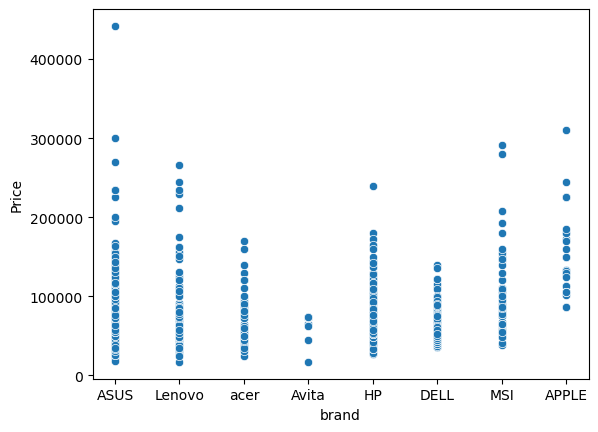

In [8]:
sns.scatterplot(x = data['brand'] , y = data['Price'] , )

In [9]:
data.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

In [10]:
cat = data.columns[data.dtypes == 'object']
cat

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'rating'],
      dtype='object')

In [11]:
data = pd.get_dummies(data, columns=cat, dtype=int)

In [12]:
data

,Price,Number of Ratings,Number of Reviews,brand_APPLE,brand_ASUS,brand_Avita,brand_DELL,brand_HP,brand_Lenovo,brand_MSI,...,warranty_No warranty,Touchscreen_No,Touchscreen_Yes,msoffice_No,msoffice_Yes,rating_1 star,rating_2 stars,rating_3 stars,rating_4 stars,rating_5 stars
0,34649,3,0,0,1,0,0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
1,38999,65,5,0,0,0,0,0,1,0,...,1,1,0,1,0,0,0,1,0,0
2,39999,8,1,0,0,0,0,0,1,0,...,1,1,0,1,0,0,0,1,0,0
3,69990,0,0,0,1,0,0,0,0,0,...,1,1,0,1,0,0,0,1,0,0
4,26990,0,0,0,1,0,0,0,0,0,...,1,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,135990,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
819,144990,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
820,149990,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
821,142990,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [13]:
X = data.drop('Price',axis=1)
y = data['Price']

In [14]:
X

,Number of Ratings,Number of Reviews,brand_APPLE,brand_ASUS,brand_Avita,brand_DELL,brand_HP,brand_Lenovo,brand_MSI,brand_acer,...,warranty_No warranty,Touchscreen_No,Touchscreen_Yes,msoffice_No,msoffice_Yes,rating_1 star,rating_2 stars,rating_3 stars,rating_4 stars,rating_5 stars
0,3,0,0,1,0,0,0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
1,65,5,0,0,0,0,0,1,0,0,...,1,1,0,1,0,0,0,1,0,0
2,8,1,0,0,0,0,0,1,0,0,...,1,1,0,1,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,1,1,0,1,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,1,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
819,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
820,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
821,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [15]:
y

0       34649
1       38999
2       39999
3       69990
4       26990
        ...  
818    135990
819    144990
820    149990
821    142990
822     57490
Name: Price, Length: 823, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr = LinearRegression()

In [19]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
y_pred = lr.predict(X_test)

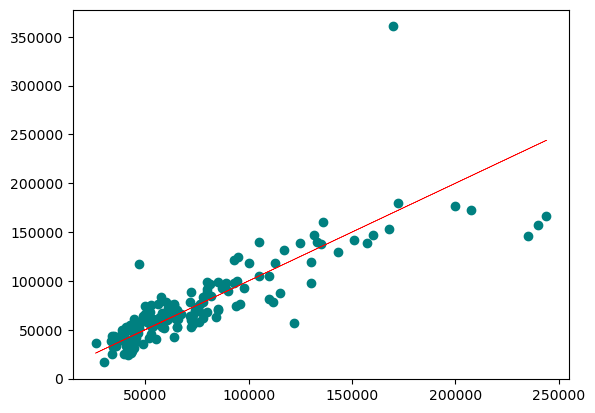

In [21]:
plt.scatter(y_test,y_pred,color='teal')
plt.plot(y_test,y_test,color='red',lw=0.5)

In [22]:
lr.score(X_train,y_train)

0.8363710762486442

In [23]:
lr.score(X_test,y_test)

0.6681613846153955

In [24]:
from sklearn.metrics import r2_score

In [25]:
r2_score(y_test,y_pred)

0.6681613846153955